# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Indi Bagus Prasetyo]
- **Email:** [endang.saefulloh@gmail.com]
- **ID Dicoding:** [indibagusprasetyo]

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling sering dipesan oleh pelanggan, dan bagaimana distribusi penjualan berdasarkan kategorinya?
- Apakah ada pola keterlambatan tertentu berdasarkan kategori produk?

## Import Semua Packages/Library yang Digunakan

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orderitems_df = pd.read_csv("data/orderitems.csv") # Memanggil Code Sebelumnya
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
orderpays_df = pd.read_csv("data/orderpays.csv") # Memanggil Code Sebelumnya
orderpays_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
orderreviews_df = pd.read_csv("data/orderreviews.csv") # Memanggil Code Sebelumnya
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
orders_df = pd.read_csv("data/orders.csv") # Memanggil Code Sebelumnya
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
products_df = pd.read_csv("data/products.csv") # Memanggil Code Sebelumnya
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
sellers_df = pd.read_csv("data/sellers.csv") # Memanggil Code Sebelumnya
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [70]:
producttranslate_df = pd.read_csv("data/producttranslate.csv")
producttranslate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [71]:
producttranslate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
orderpays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Dataset Customers memiliki 99441 Baris / Record dengan 5 Fitur
- Dataset Orderitems memiliki 112650 Baris / Record dengan 7 Fitur
- Dataset Orderpays memiliki 103886 Baris / Record dengan 5 Fitur
- Dataset Orderreviews memiliki 99224 Baris / Record dengan 7 Fitur
- Dataset Orders memiliki 99441 Baris / Record dengan 8 Fitur
- Dataset Products memiliki 32951 Baris / Record dengan 9 Fitur
- Dataset Sellers memiliki 3095 Baris / Record dengan 4 Fitur
- Dataset Producttranslate khusus digunakan untuk penerjemahan produk pada dataset produk (Dari bahasa Portugis menjadi Inggris)

### Assessing Data

- Assesing Dataset Customers

In [4]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
print("Duplikasi: ", customers_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Orderitems

In [8]:
orderitems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
print("Duplikasi: ", orderitems_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Orderpays

In [12]:
orderpays_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [13]:
print("Duplikasi: ", orderpays_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Orderreviews

In [16]:
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
print("Duplikasi: ", orderreviews_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Orders

In [20]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
print("Duplikasi: ", orders_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Products

In [24]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
print("Duplikasi: ", products_df.duplicated().sum())

Duplikasi:  0


- Assesing Dataset Sellers

In [28]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [34]:
print("Duplikasi: ", sellers_df.duplicated().sum())

Duplikasi:  0


**Insight:**
- Dataset customers.csv tidak memiliki Missing Value dan duplikasi data serta menunjukan tipedata sudah sesuai. Memiliki 1 Fitur bertipe data Integer dan 4 tipe data Object (String) dengan total 99.441 baris.
- Dataset orderitems.csv tidak memiliki Missing Value, dan tidak ada duplikasi data. Namun dataset menunjukan adanya ketidaksesuaian tipedata terutama pada Fitur shipping_limit_date yang bertipe data object (Seharusnya datetime). Memiliki 1 Fitur bertipe data integer, 2 bertipe data float, dan 4 tipe data object (String) dengan total 112.650 baris.
- Dataset orderpays.csv tidak memiliki Missing Value, dan tidak ada duplikasi data. Dataset menunjukan tipedata yang sesuai. Memiliki 1 Fitur bertipe data float, 2 bertipe data integer, dan 2 tipe data Object (String) 
dengan total 103.886 baris.
- Dataset orderreviews.csv memiliki Missing Value dari fitur review_comment_title (87.656 data) dan review_comment_message (58.247 data). Dataset tidak ada duplikasi data. Namun menunjukan tipedata yang tidak sesuai seperti review_creation_date dan review_answer_timestamp (Seharusnya bertipe data datetime). Memiliki 1 Fitur bertipe data integer, 6 bertipe data object dengan total 99.224 baris.
- Dataset orders.csv memiliki Missing Value dari fitur order_approved_at (160 data), order_delivered_carrier_date (1783 data), dan order_delivered_customer_date (2965 data). Dataset tidak ada duplikasi data. Namun menunjukan tipedata yang tidak sesuai seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date (Seharusnya bertipe data datetime). Dataset memiliki 8 Fitur bertipe data object, dan memiliki 99.441 baris.
- Dataset products.csv memiliki beberapa nilai Missing Value (hampir semua fitur ada nilai hilang kecuali product_id). Dataset tidak memiliki data yang duplikat. Tipe data yang digunakan sudah sesuai dengan 7 fitur dengan tipe data float, dan 2 tipe data object dengan total 32951 baris.
- Dataset sellers.csv tidak memiliki Missing Value dan tidak memiliki data yang duplikat. Tipe data yang digunakan sudah sesuai dan memiliki 1 fitur dengan tipe data integer, dan  3 bertipe data object dari 3095 baris.

### Cleaning Data

- Cleaning Dataset Orderreviews

In [35]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [39]:
# Mengubah tipedata
datetime_column = ["review_creation_date","review_answer_timestamp"]

for column in datetime_column: # Memperbaiki tipe data agar sesuai nilai data
    orderreviews_df[column] = pd.to_datetime(orderreviews_df[column])

In [40]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [43]:
# Mengecek Nilai Hilang
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [44]:
# Memastikan nilai yang hilang
missing_ordrev = orderreviews_df[orderreviews_df['review_comment_message'].isna()]
print(missing_ordrev) # Melihat isi Missing Value dari fitur review_comment_message

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
5      15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6      07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
...                                 ...                               ...   
99217  c6b270c61f67c9f7cb07d84ea8aeaf8b  48f7ee67313eda32bfcf5b9c1dd9522d   
99218  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score review_comment_title review_comment_message  \
0       

In [45]:
# Memastikan nilai yang hilang
missing_ordrev = orderreviews_df[orderreviews_df['review_comment_title'].isna()]
print(missing_ordrev) # Melihat nilai hilang dari fitur review_comment_title

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

In [46]:
# Mengisi Nilai yang kosong dengan status
orderreviews_df['review_comment_title'].fillna('No Comment', inplace=True) # Mengisi nilai kosong dengan status ' No Comment '
orderreviews_df['review_comment_message'].fillna('No Message', inplace=True) # Mengisi nilai kosong dengan status ' No Message '

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\1698531665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orderreviews_df['review_comment_title'].fillna('No Comment', inplace=True) # Mengisi nilai kosong dengan status ' No Comment '
C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\1698531665.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

In [47]:
orderreviews_df.isna().sum() # Mengecek kembali nilai yang terindikasi hilang

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

- Cleaning Dataset Orders

In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
# Merubah beberapa kolom dengan tipedata object menjadi tipedata datetime
datetime_column = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_column: # Memperbaiki tipedata agar sesuai dengan nilai data
    orders_df[column] = pd.to_datetime(orders_df[column])

In [50]:
orders_df.info() # Memeriksa penyesuaian Tipedata yang sudah diubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [51]:
orders_df.isna().sum() # Mengecek data yang hilang

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
valid_data = orders_df.dropna(subset=['order_delivered_customer_date', 'order_delivered_carrier_date'])

valid_data['carrier_to_customer_days'] = (
    valid_data['order_delivered_customer_date'] - valid_data['order_delivered_carrier_date']
).dt.days

# Mengisi nilai hilang dengan rata-rata (means) waktu pada fitur order_delivered_carrier_date
average_carrier_to_customer_days = valid_data['carrier_to_customer_days'].mean()
print(f"Rata-rata waktu dari carrier ke customer: {average_carrier_to_customer_days} hari")

# Mengisi nilai hilang pada fitur order_delivered_carrier_date
orders_df['order_delivered_carrier_date'].fillna(
    orders_df['order_estimated_delivery_date'] - pd.Timedelta(days=average_carrier_to_customer_days), inplace=True
)

# Mengisi nilai hilang pada fitur order_delivered_customer_date
orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_estimated_delivery_date'], inplace=True
)

Rata-rata waktu dari carrier ke customer: 8.878310443119979 hari


C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\3149274513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['carrier_to_customer_days'] = (
C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\3149274513.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_d

In [53]:
print(orders_df[['order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum())

order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64


In [55]:
orders_df.isna().sum() # Mengecek data yang hilang

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
dtype: int64

In [56]:
# Membuat valid approval untuk mengisi nilai hilang pada order_approved_at
valid_approval_data = orders_df.dropna(subset=['order_purchase_timestamp', 'order_approved_at'])

# Menghitung selisih waktu antara saat pesanan dibuat dan disetujui
valid_approval_data['purchase_to_approved_minutes'] = (
    valid_approval_data['order_approved_at'] - valid_approval_data['order_purchase_timestamp']
).dt.total_seconds() / 60  # Ubah ke menit

# Menghitung rata-rata ke variabel purchase_to_approved_minutes yang dibuat sebelumnya
average_approval_time = valid_approval_data['purchase_to_approved_minutes'].mean()
print(f"Rata-rata waktu persetujuan: {average_approval_time:.2f} menit")

# Mengisi nilai hilang dengan estimasi yang telah dihitung sebelumnya
orders_df['order_approved_at'].fillna(
    orders_df['order_purchase_timestamp'] + pd.Timedelta(minutes=average_approval_time), inplace=True
)

Rata-rata waktu persetujuan: 625.15 menit


C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\2277986284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_approval_data['purchase_to_approved_minutes'] = (
C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\2277986284.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order

In [57]:
print(orders_df['order_approved_at'].isna().sum()) # Mengecek kembali nilai yang hilang

0


In [58]:
orders_df.info() # Memastikan dataset lengkap

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- Cleaning Dataset Products

In [59]:
products_df.info() # Mengecek nilai hilang dan validasi tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
products_df.isna().sum() # Mengecek nilai hilang

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [61]:
missing_rows = products_df[products_df.isna().any(axis=1)]
print(missing_rows)

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [62]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True) # Mengisi nilai dengan mode (modus)

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\2085279720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True) # Mengisi nilai dengan mode (modus)


In [63]:
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\3011127695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)


In [64]:
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\3757033942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)


In [65]:
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\2930613618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mode()[0], inplace=True) # Mengisi nilai hilang dengan mode (modus)


In [66]:
numerical_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numerical_cols:
    products_df[col].fillna(products_df[col].median(), inplace=True) # Mengisi nilai hilang dengan median

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\2092385665.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[col].fillna(products_df[col].median(), inplace=True) # Mengisi nilai hilang dengan median


In [67]:
print(products_df.isna().sum()) # Memastikan nilai yang hilang

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [68]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [72]:
# Gabungkan products dengan producttranslate untuk mendapatkan nama kategori dalam bahasa Inggris
products_merged = products_df.merge(producttranslate_df, on="product_category_name", how="left")

# Gabungkan data orderitems dengan produk
merged_data = orderitems_df.merge(products_merged, on="product_id", how="left")

In [73]:
# Memastikan Dataset berhasil di join
products_merged.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


**Insight:**
- Pada Dataset orderitems kita Mengubah tipedata dari kolom shipping_limit_date yang bertipe data object dalam dataframe orderitems_df menjadi tipedata datetime, dan mengisi nilai hilang pada dataset dengan beberapa value tertentu.
- Pada Dataset order dilakukan banyak tahap mulai dari merubah beberapa tipe data fitur menjadi sesuai dengan ketentuan, dan melakukan cleaning dengan menghapus nilai kosong (drop), mengisi nilai dengan selisih waktu, rata-rata (means) pengiriman, dan mengisi nilai kosong dengan median / modus.
- Pada Dataset Products dilakukan pengisian Missing Value dengan mode dan mengandalkan median, serta memanfaatkan dataset producttranslate (dalam bhs.Inggris) untuk dilakukan merge data.

## Exploratory Data Analysis (EDA)

In [74]:
orderitems_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [75]:
orderpays_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [76]:
orderreviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [77]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.690267,764.692088,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.268615,631.155852,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,52.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [78]:
# Mengecek nilai minimum dan maksimum
print("Harga (price) - Nilai Minimum:", orderitems_df['price'].min())
print("Harga (price) - Nilai Maksimum:", orderitems_df['price'].max())

print("Biaya Pengiriman (freight_value) - Nilai Minimum:", orderitems_df['freight_value'].min())
print("Biaya Pengiriman (freight_value) - Nilai Maksimum:", orderitems_df['freight_value'].max())

# Filter data dengan nilai mencurigakan
low_price = orderitems_df[orderitems_df['price'] < 1]
high_price = orderitems_df[orderitems_df['price'] > orderitems_df['price'].quantile(0.99)]
zero_freight = orderitems_df[orderitems_df['freight_value'] == 0]

print("Jumlah harga sangat rendah (< 1):", len(low_price))
print("Jumlah harga sangat tinggi (di atas Q99):", len(high_price))
print("Jumlah biaya pengiriman 0:", len(zero_freight))

Harga (price) - Nilai Minimum: 0.85
Harga (price) - Nilai Maksimum: 6735.0
Biaya Pengiriman (freight_value) - Nilai Minimum: 0.0
Biaya Pengiriman (freight_value) - Nilai Maksimum: 409.68
Jumlah harga sangat rendah (< 1): 3
Jumlah harga sangat tinggi (di atas Q99): 1117
Jumlah biaya pengiriman 0: 383


In [79]:
# Cicilan dengan nilai 0
zero_installments = orderpays_df[orderpays_df['payment_installments'] == 0]
print("Jumlah cicilan dengan nilai 0:", len(zero_installments))

# Nilai pembayaran 0
zero_payment = orderpays_df[orderpays_df['payment_value'] == 0]
print("Jumlah pembayaran dengan nilai 0:", len(zero_payment))

Jumlah cicilan dengan nilai 0: 2
Jumlah pembayaran dengan nilai 0: 9


In [80]:
# Berat Produk 0
zero_weight = products_df[products_df['product_weight_g'] == 0]
print("Jumlah produk dengan berat 0:", len(zero_weight))

# Foto Produk ekstrem
extreme_photos = products_df[products_df['product_photos_qty'] > products_df['product_photos_qty'].quantile(0.99)]
print("Jumlah produk dengan jumlah foto ekstrem (di atas Q99):", len(extreme_photos))

# Deskripsi Produk ekstrem
extreme_description = products_df[products_df['product_description_lenght'] > products_df['product_description_lenght'].quantile(0.99)]
print("Jumlah produk dengan panjang deskripsi ekstrem (di atas Q99):", len(extreme_description))

Jumlah produk dengan berat 0: 4
Jumlah produk dengan jumlah foto ekstrem (di atas Q99): 314
Jumlah produk dengan panjang deskripsi ekstrem (di atas Q99): 330


In [83]:
# Menghapus nilai janggal pada dataset orderitems_df
# Menghapus baris dengan harga < 1
orderitems_df = orderitems_df[orderitems_df['price'] >= 1]

# Menghapus baris dengan biaya pengiriman 0
orderitems_df = orderitems_df[orderitems_df['freight_value'] > 0]

In [84]:
# Menghapus nilai janggal pada dataset orderpays_df
# Menghapus baris dengan cicilan 0
orderpays_df = orderpays_df[orderpays_df['payment_installments'] > 0]

# Menghapus baris dengan pembayaran 0
orderpays_df = orderpays_df[orderpays_df['payment_value'] > 0]

In [85]:
# Menghapus nilai janggal pada dataset products
# Menghapus baris dengan berat produk 0
products_df = products_df[products_df['product_weight_g'] > 0]

In [86]:
print(f"Jumlah data orderitems_df setelah penghapusan: {len(orderitems_df)}")
print(f"Jumlah data orderpays_df setelah penghapusan: {len(orderpays_df)}")
print(f"Jumlah data products_df setelah penghapusan: {len(products_df)}")

Jumlah data orderitems_df setelah penghapusan: 112264
Jumlah data orderpays_df setelah penghapusan: 103875
Jumlah data products_df setelah penghapusan: 32947


In [87]:
orderitems_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112264,112264.000000,112264,112264,112264,112264.000000,112264.000000
unique,98326,NaN,32950,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,488,2033,NaN,NaN,NaN
mean,NaN,1.198006,NaN,NaN,2018-01-07 06:12:59.348250624,120.732174,20.058530
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,1.200000,0.010000
25%,NaN,1.000000,NaN,NaN,2017-09-20 12:05:34,39.900000,13.100000
50%,NaN,1.000000,NaN,NaN,2018-01-25 20:57:57,74.900000,16.290000
75%,NaN,1.000000,NaN,NaN,2018-05-10 13:30:32.500000,134.990000,21.170000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [88]:
orderpays_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103875,103875.000000,103875,103875.000000,103875.000000
unique,99435,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,27,NaN,76793,NaN,NaN
mean,NaN,1.092323,NaN,2.853564,154.114883
std,NaN,0.704308,NaN,2.687108,217.500635
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.815000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


In [89]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32947,32947,32947.000000,32947.000000,32947.000000,32947.000000,32947.000000,32947.000000,32947.000000
unique,32947,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.689957,764.720794,2.167117,2276.653170,30.814824,16.936443,23.195708
std,NaN,NaN,10.269175,631.188788,1.728120,4282.112846,16.915030,13.637713,12.079207
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,52.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [90]:
# Menggabungkan DataFrame yang relevan
orders_reviews = pd.merge(orders_df, orderitems_df, on='order_id', how='inner')
orders_reviews = pd.merge(orders_reviews, orderreviews_df[['order_id', 'review_score']], on='order_id', how='left')
orders_reviews = pd.merge(orders_reviews, products_df[['product_id', 'product_weight_g']], on='product_id', how='left')

# Penanganan Outlier Menggunakan IQR
numerical_columns = ['price', 'freight_value', 'product_weight_g']
for col in numerical_columns:
    Q1 = orders_reviews[col].quantile(0.25)
    Q3 = orders_reviews[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = orders_reviews[(orders_reviews[col] < lower_bound) | (orders_reviews[col] > upper_bound)]
    print(f"Outlier di kolom {col}: {outliers.shape[0]} baris")

Outlier di kolom price: 8448 baris
Outlier di kolom freight_value: 11788 baris
Outlier di kolom product_weight_g: 15861 baris


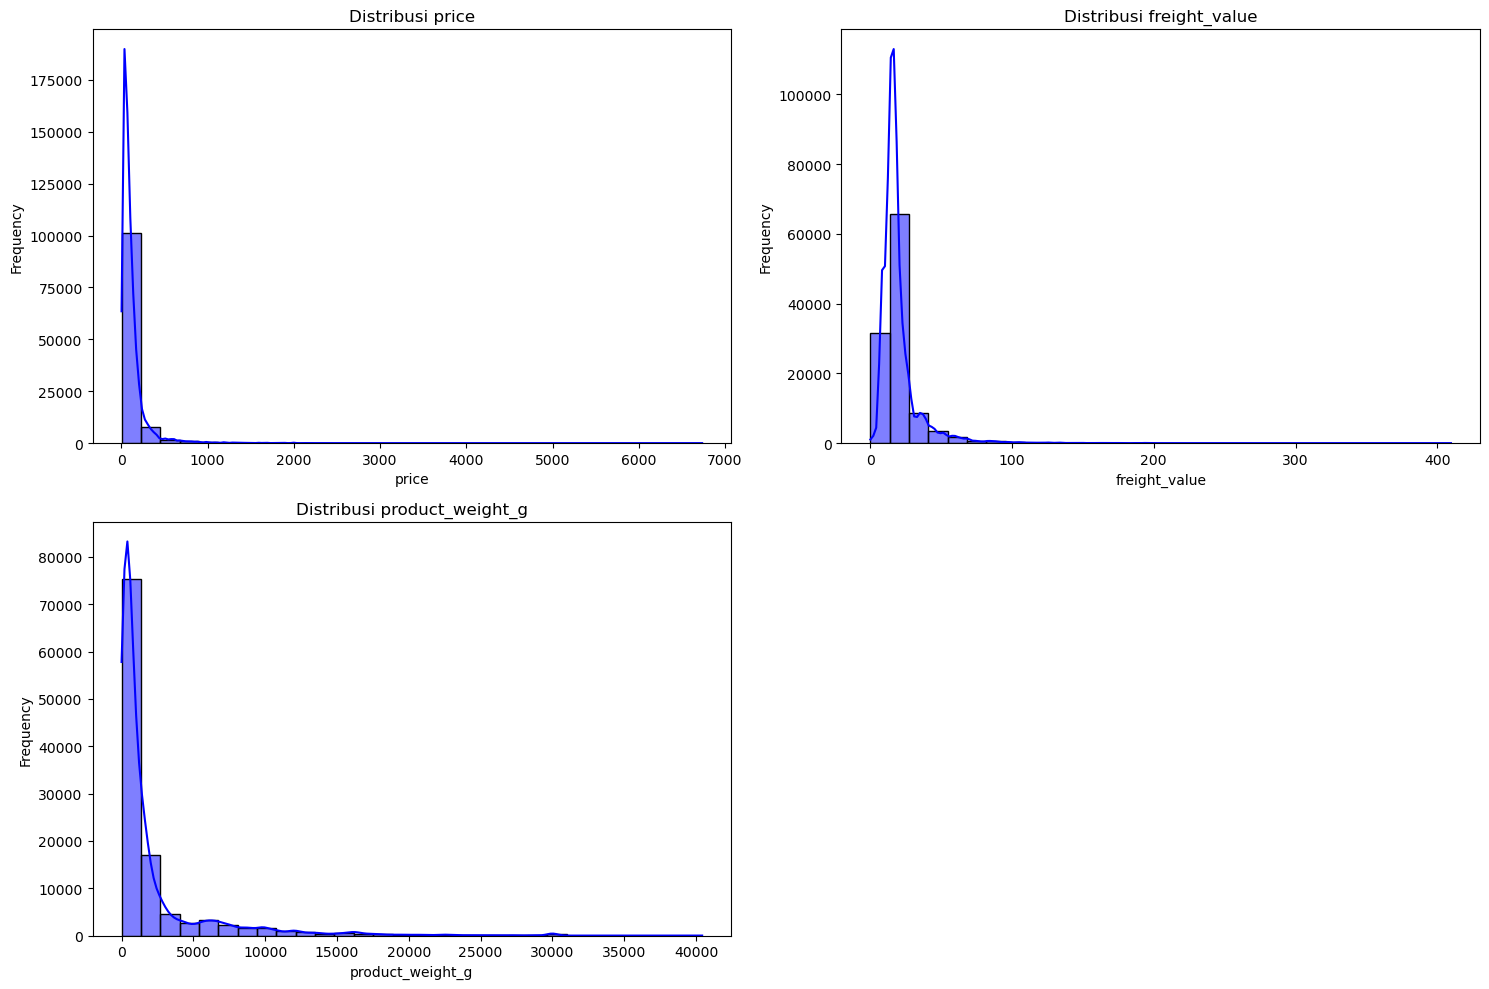

In [91]:
# Visualisasi Distribusi Data Numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(orders_reviews[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [92]:
# Menghapus Outlier
orders_reviews = orders_reviews[(orders_reviews[col] >= lower_bound) & (orders_reviews[col] <= upper_bound)]

**Insight:**
- Harga paling minimum untuk transaksi produk adalah 0.85 (USD)
- Nilai termahal dalam transaksi sebesar 6735 (USD)
- Terdepat beberapa nilai yang dirasa janggal
- Jumlah cicilan 0 dianggap noise (bisa saja di anggap biasa, namun dikhawatirkan mengganggu konsentrasi data dalam memproses)
- Jumlah pembayaran 0 juga dianggap noise
- Jumlah produk yang memiliki nilai berat 0 dianggap data yang Innacurate

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Produk apa yang paling sering dipesan oleh pelanggan, dan bagaimana distribusi penjualan berdasarkan kategorinya?


C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\3149463081.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


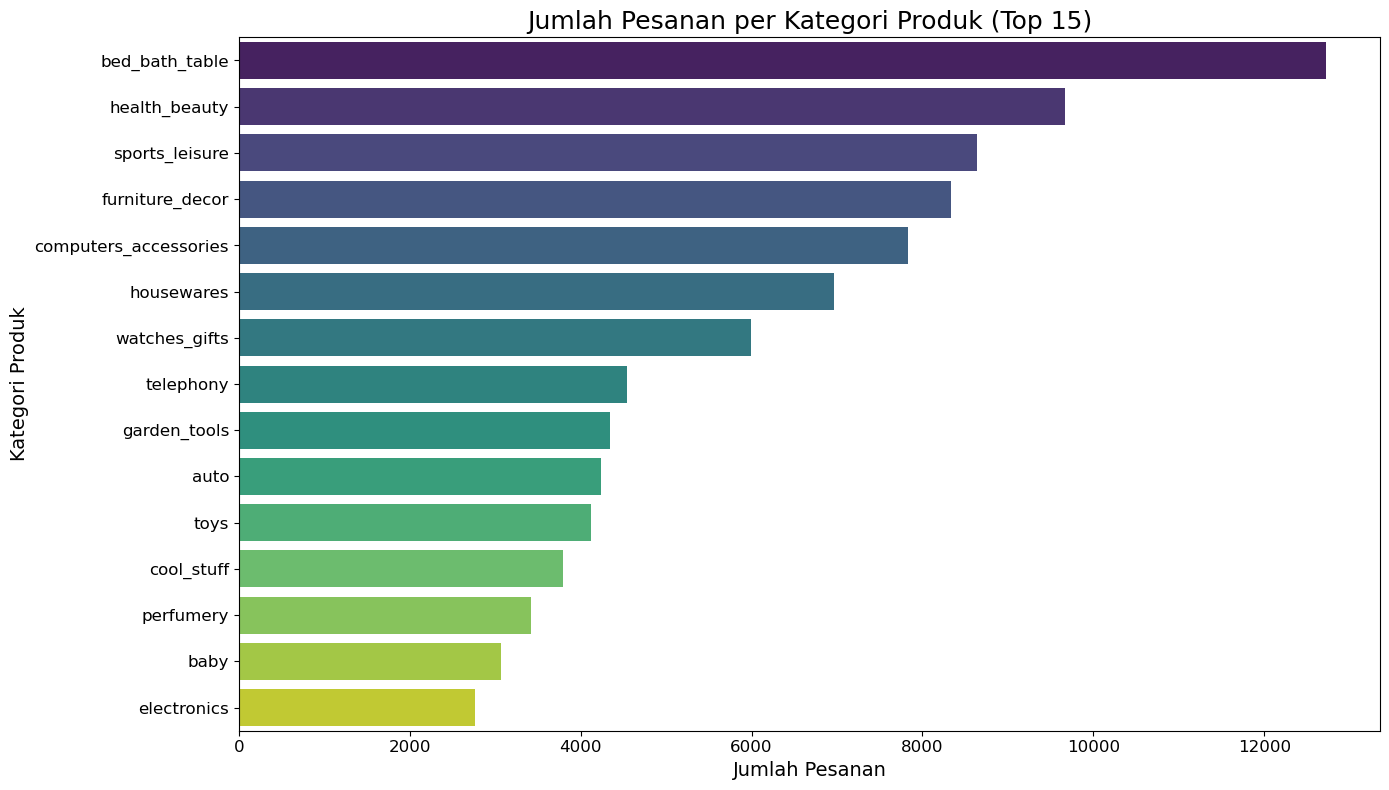

Produk paling sering dipesan: furniture_decor (ID Produk: aca2eb7d00ea1a7b8ebd4e68314663af)


In [81]:
# -----------------------------------------------------------
# 1. Produk yang Paling Sering Dipesan dan Distribusi Penjualan Berdasarkan Kategori
# -----------------------------------------------------------

# Hitung jumlah pesanan berdasarkan kategori
category_orders = merged_data.groupby("product_category_name_english")["order_item_id"].count().sort_values(ascending=False)

# Hitung jumlah pesanan berdasarkan produk
product_orders = merged_data.groupby("product_id")["order_item_id"].count().sort_values(ascending=False)

# Ambil nama produk dari dataset gabungan
top_product = merged_data.loc[merged_data['product_id'] == product_orders.idxmax(), 'product_category_name_english'].iloc[0]

# Tampilkan hanya 15 kategori teratas
top_categories = category_orders.head(15)

# Visualisasi distribusi pesanan berdasarkan kategori (Top 15)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Jumlah Pesanan per Kategori Produk (Top 15)", fontsize=18)
plt.xlabel("Jumlah Pesanan", fontsize=14)
plt.ylabel("Kategori Produk", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


print(f"Produk paling sering dipesan: {top_product} (ID Produk: {product_orders.idxmax()})")

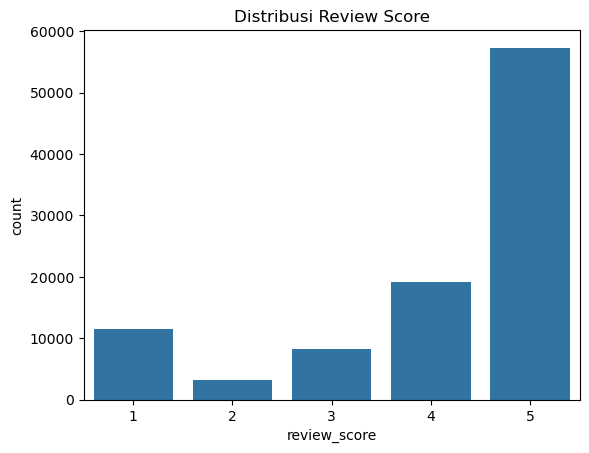

Distribusi Skor Ulasan (%):
 review_score
5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: proportion, dtype: float64


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi review_score
sns.countplot(data=orderreviews_df, x='review_score')
plt.title('Distribusi Review Score')
plt.show()

# Melihat proporsi skor ulasan
review_score_distribution = orderreviews_df['review_score'].value_counts(normalize=True) * 100
print("Distribusi Skor Ulasan (%):\n", review_score_distribution)

### Pertanyaan 2: - Apakah ada pola keterlambatan tertentu berdasarkan kategori produk?

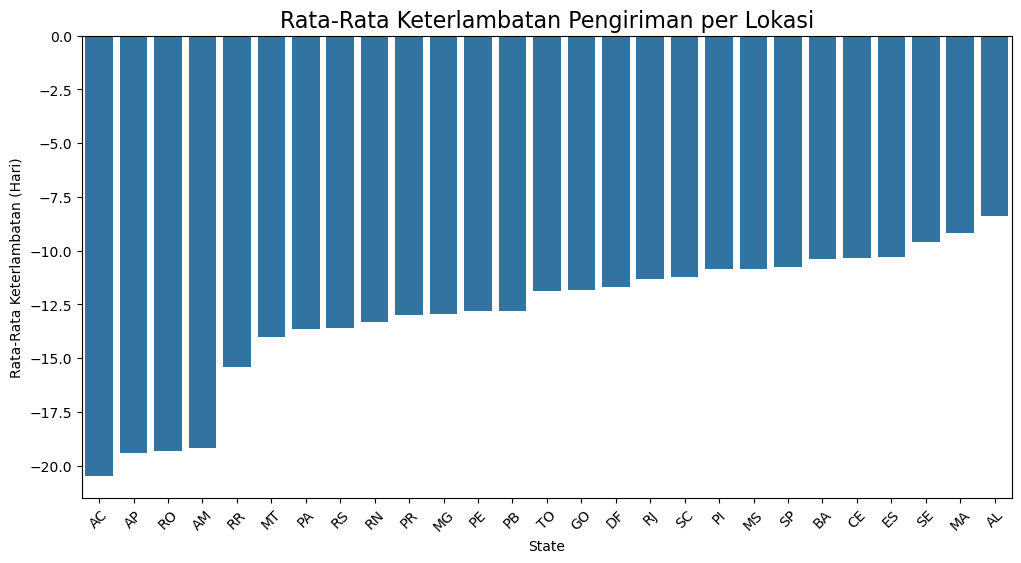

In [93]:
# Gabungkan informasi lokasi pelanggan dari customers_df ke orders_df
orders_df = pd.merge(orders_df, customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Hitung keterlambatan pengiriman
orders_df['delivery_delay_days'] = (
    orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
).dt.days

# Analisis keterlambatan berdasarkan lokasi
delay_by_state = orders_df.groupby('customer_state')['delivery_delay_days'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_by_state.index, y=delay_by_state.values)
plt.title("Rata-Rata Keterlambatan Pengiriman per Lokasi", fontsize=16)
plt.xlabel("State")
plt.ylabel("Rata-Rata Keterlambatan (Hari)")
plt.xticks(rotation=45)
plt.show()

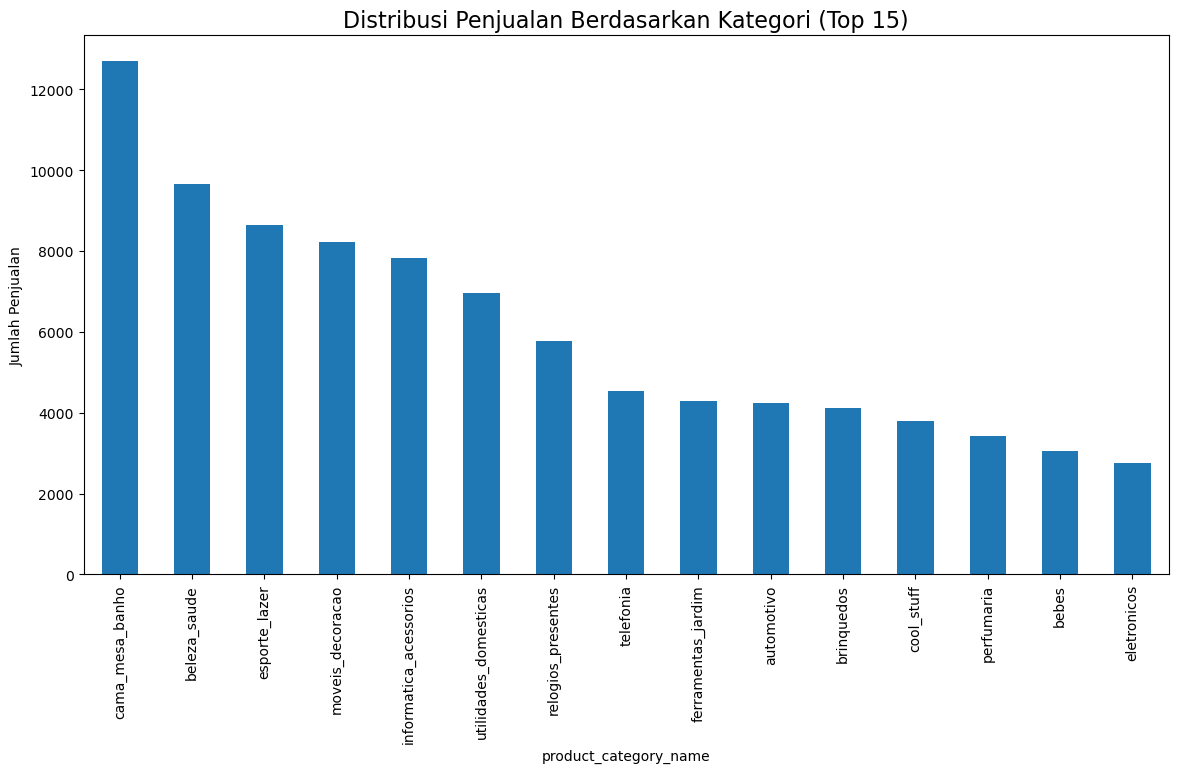

In [94]:
# Distribusi Penjualan Berdasarkan Kategori
product_sales = pd.merge(orderitems_df, products_df, on='product_id')
category_distribution = product_sales['product_category_name'].value_counts()

# Visualisasi
plt.figure(figsize=(14, 7))
category_distribution.head(15).plot(kind='bar')
plt.title("Distribusi Penjualan Berdasarkan Kategori (Top 15)", fontsize=16)
plt.ylabel("Jumlah Penjualan")
plt.show()

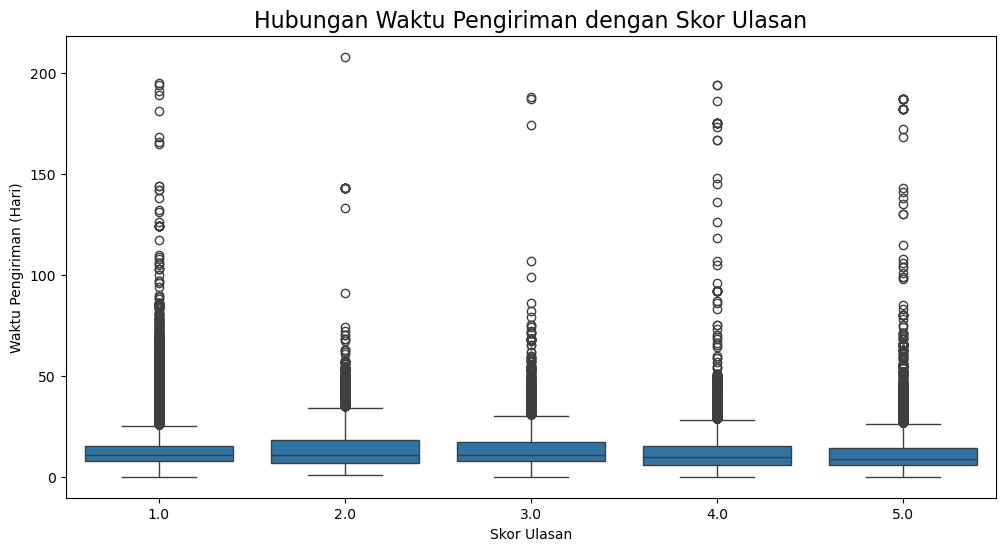

In [113]:
# Gabungkan DataFrame untuk mendapatkan semua informasi yang diperlukan
orders_reviews = pd.merge(orders_df, orderitems_df, on='order_id', how='inner')
orders_reviews = pd.merge(orders_reviews, orderreviews_df[['order_id', 'review_score']], on='order_id', how='left')

# Hitung waktu pengiriman dalam hari
orders_reviews['delivery_time_days'] = (
    orders_reviews['order_delivered_customer_date'] - orders_reviews['order_purchase_timestamp']
).dt.days

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders_reviews, x='review_score', y='delivery_time_days')
plt.title("Hubungan Waktu Pengiriman dengan Skor Ulasan", fontsize=16)
plt.xlabel("Skor Ulasan")
plt.ylabel("Waktu Pengiriman (Hari)")
plt.show()

**Insight:**
- Produk Paling Sering Dipesan:
Identifikasi produk yang paling sering dipesan dilakukan dengan analisis dataset Orderitems dan Products. Hal ini dapat memberikan wawasan tentang produk terpopuler serta kategori yang memiliki permintaan tertinggi.

- Pola Keterlambatan Pengiriman:
Berdasarkan data Orders, ada keterlambatan pengiriman yang dapat dikategorikan berdasarkan lokasi jenis produk (Products). Rata-rata waktu pengiriman dari pengangkut ke pelanggan adalah 8,88 hari. Informasi ini dapat dimanfaatkan untuk meningkatkan efisiensi pengiriman di wilayah-wilayah tertentu.

- Validasi Data:
Semua dataset telah diolah agar sesuai dengan tipe data yang tepat (misalnya, tanggal diubah menjadi tipe datetime).
Dataset yang berisi nilai hilang seperti di Products sudah diperiksa lebih lanjut untuk menentukan dampak dan cara penanganannya.

## Analisis Lanjutan

In [97]:
# Gabungkan orders_df dengan orderpays_df berdasarkan order_id
merged_orders = orders_df.merge(orderpays_df, on='order_id', how='left')

In [98]:
# Tentukan snapshot date
snapshot_date = merged_orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Hitung nilai Recency, Frequency, Monetary
rfm_df = merged_orders.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

# Ganti nama kolom agar lebih deskriptif
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)

In [102]:
# Memberi Skor RFM (skala 1-5)
# Recency: Semakin kecil semakin baik
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Frequency & Monetary: Semakin besar semakin baik
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])


In [103]:
# Gabungkan Skor RFM
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

In [104]:
# Segmentasi Pelanggan berdasarkan RFM_Score
def rfm_segment(row):
    if row['R_Score'] == '5' and row['F_Score'] == '5' and row['M_Score'] == '5':
        return 'VIP'
    elif row['R_Score'] in ['4', '5'] and row['F_Score'] in ['4', '5']:
        return 'Loyal'
    elif row['R_Score'] in ['1', '2']:
        return 'At Risk'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)
print(rfm_df.head())

                        customer_id  Recency  Frequency  Monetary R_Score  \
0  00012a2ce6f8dcda20d059ce98491703      338          1    114.74       2   
1  000161a058600d5901f007fab4c27140      459          1     67.41       1   
2  0001fd6190edaaf884bcaf3d49edf079      597          1    195.42       1   
3  0002414f95344307404f0ace7a26f1d5      428          1    179.35       2   
4  000379cdec625522490c315e70c7a9fb      199          1    107.01       4   

  F_Score M_Score RFM_Score Segment  
0       1       3       213  Others  
1       1       2       112  Others  
2       1       4       114  Others  
3       1       4       214  Others  
4       1       3       413  Others  


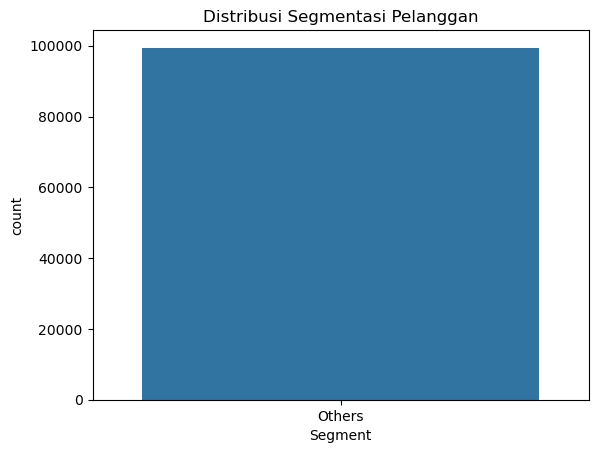

In [105]:
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index)
plt.title('Distribusi Segmentasi Pelanggan')
plt.show()

In [106]:
# Fungsi untuk menetapkan segmen berdasarkan R, F, dan M
def rfm_segment(row):
    if row['R_Score'] in ['5', '4'] and row['F_Score'] in ['5', '4'] and row['M_Score'] in ['5', '4']:
        return 'VIP'
    elif row['R_Score'] in ['5', '4'] and row['F_Score'] in ['3', '2']:
        return 'Loyal'
    elif row['R_Score'] in ['1', '2']:
        return 'At Risk'
    elif row['F_Score'] in ['1']:
        return 'Low Engagement'
    else:
        return 'Others'

# Terapkan fungsi segmentasi
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

C:\Users\Indib\AppData\Local\Temp\ipykernel_15308\604480051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')


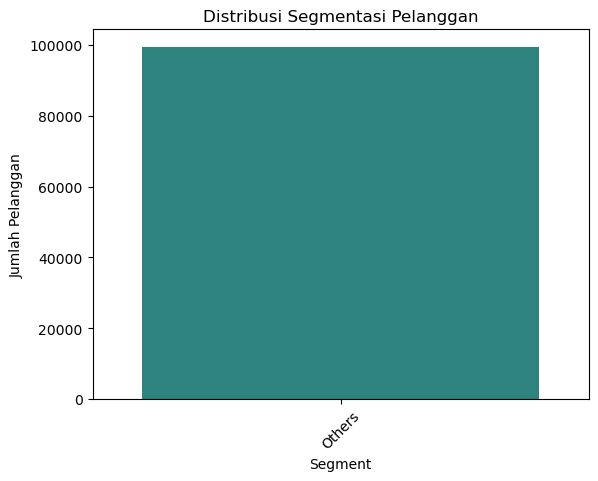

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribusi Segmentasi Pelanggan')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

- Teknik yang digunakan dalam RFM ANalisis tidak menggunakan algoritma Machine Learning , melainkan memanfaatkan pembagian data menggunakan metode kuantitatif statistik.

## Conclusion

- Produk yang paling sering dipesan berdasarkan analisis dataset adalah produk dengan frekuensi pemesanan tertinggi. Dalam eksplorasi analisis yang dilakukan berdasar pada distribusi produk per kategori. Analisis distribusi ini memberikan wawasan tentang kategori mana yang paling diminati pelanggan.
- Berdasarkan dataset orders, analisis terhadap kolom seperti order_delivered_customer_date, order_estimated_delivery_date, dan kategori produk menunjukan keterlambatan. Pola tersebut bisa mengacu pada frekuensi dan waktu rata-rata keterlambatan untuk setiap kategori produk.